In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import os
import numpy as np

In [2]:
data_dir = '/home/jing/Phd_project/project_UCD_blca/blca_DATA/blca_DATA_GSE135337/'
os.chdir(data_dir)

In [3]:
names_list = ["GSM4006644_BC1", "GSM4006647_BC4" ,"GSM4006648_BC5", "GSM4751267_BC6" ,"GSM4751268_BC7"]

GSM4006644_BC1


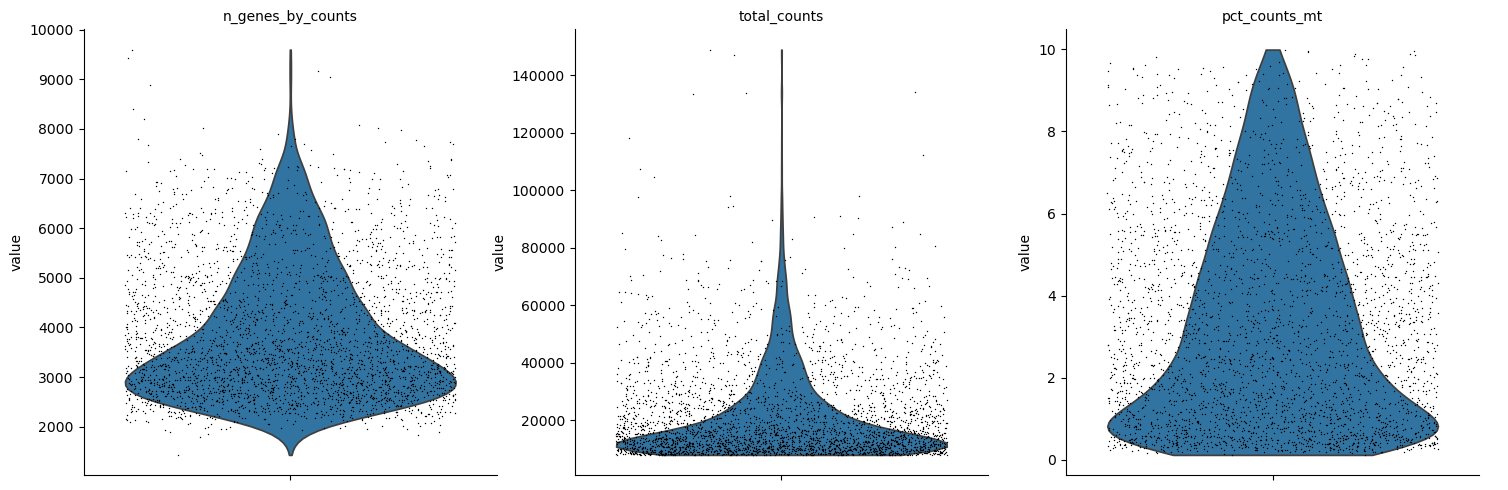

/tmp/ipykernel_1440366/4114007758.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4006647_BC4


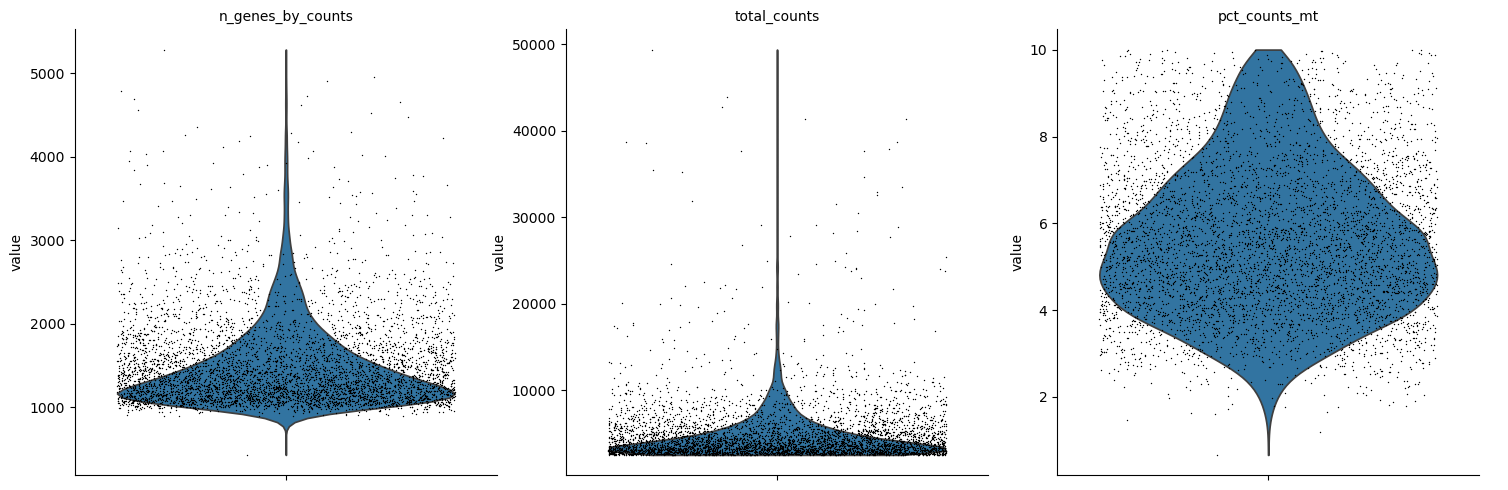

/tmp/ipykernel_1440366/4114007758.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4006648_BC5


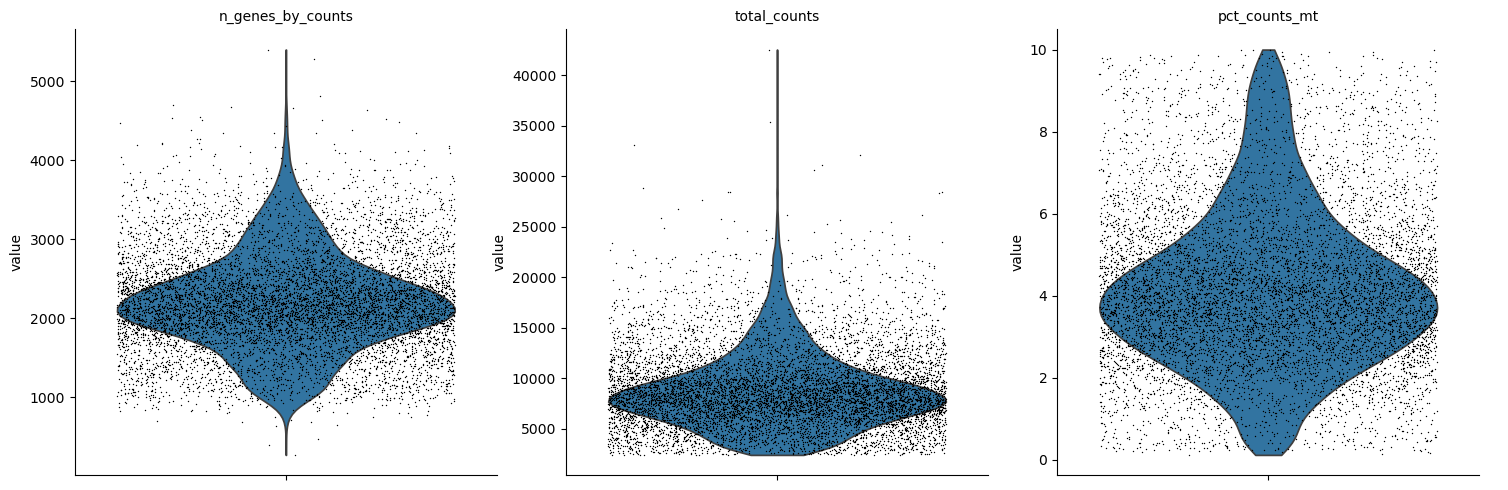

/tmp/ipykernel_1440366/4114007758.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4751267_BC6


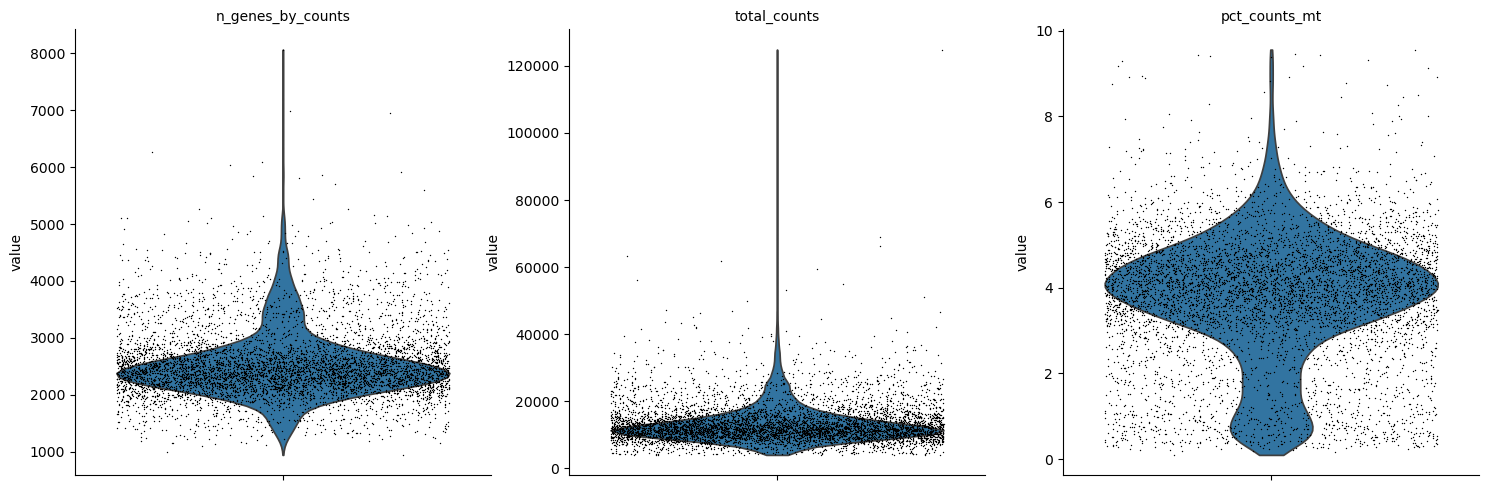

/tmp/ipykernel_1440366/4114007758.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4751268_BC7


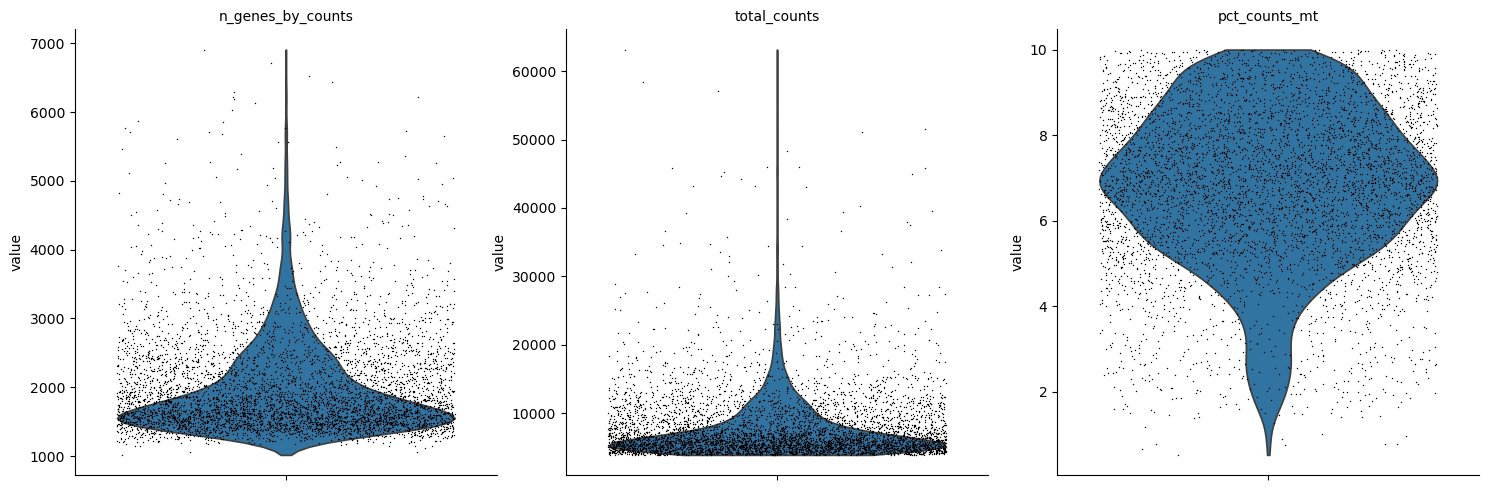

/tmp/ipykernel_1440366/4114007758.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


In [11]:
adata_list = []

# Loop over each sample and read in the AnnData object
for name in names_list:
    file_path = f"{name}_gene_cell_exprs_table.txt.gz"
    df = pd.read_csv(file_path, sep='\t')
    df.index = df.iloc[:, 0]
    gene_symbols = df.iloc[:,:2]

    # Drop the first two columns (Ensembl ID and gene name)
    df = df.iloc[:, 2:]
    # Transpose so that cells are rows and genes are columns
    df = df.T

    adata = ad.AnnData(df)

    adata.obs['CellID']= df.index
    adata.var[['Ensemble_ID','Gene']]= gene_symbols
    adata.var.index= adata.var['Gene']
    adata.var_names_make_unique() 
    adata.var['mt'] =adata.var_names.str.startswith('MT-')

    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.calculate_qc_metrics(adata,qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    print(name)
    sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True)
    
    adata= adata[adata.obs.n_genes_by_counts <6001, :]
    #adata= adata[adata.obs.pct_counts_mt< 5, :].copy()

    adata.obs['source'] = name
    adata.layers["counts"] = adata.X.copy()    

    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata,base=2)
    adata.raw = adata  # keep full dimension safe
    adata_list.append(adata)
    

In [14]:
batch_names = [adata.obs['source'].iloc[0] for adata in adata_list]
adata = adata_list[0].concatenate(adata_list[1:], batch_key='source', batch_categories=batch_names)       

/tmp/ipykernel_1440366/1630503105.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata_list[0].concatenate(adata_list[1:], batch_key='source', batch_categories=batch_names)


In [8]:
indices_t2 = pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/index_cluster1T2.csv', header=None)

In [10]:
indices_t2

,0
0,AAACCTGAGTCCAGGA.1-GSM4006647_BC4
1,AAACCTGCAATTCCTT.1-GSM4006647_BC4
2,AAACCTGGTGTGACGA.1-GSM4006647_BC4
3,AAACGGGCACCGAATT.1-GSM4006647_BC4
4,AAACGGGGTCATATGC.1-GSM4006647_BC4
...,...
2867,TTTGTCAGTCCGAGTC.1-GSM4006647_BC4
2868,TTTGTCAGTGATAAGT.1-GSM4006647_BC4
2869,TTTGTCATCACTGGGC.1-GSM4006647_BC4
2870,TTTGTCATCGCTTGTC.1-GSM4006647_BC4


In [30]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"
data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)


,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

In [31]:
adata_subset = adata[:, adata.var_names.isin(genes_list)]

In [32]:
indices_ta = pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/index_cluster1Ta.csv', header=None)
indices_ta = indices_ta.values.flatten()

In [3]:
indices_t2 = pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/index_cluster1T2.csv', header=None)
indices_t2 = indices_t2.values.flatten()

In [32]:
cluster_1t2= adata_subset[indices_t2, :].to_df() 

In [33]:
cluster_1ta= adata_subset[indices_ta, :].to_df() 

In [27]:
import cstarpy
from cstarpy.separation import CellStateTransition

In [34]:

cst_inv = CellStateTransition('inv',cluster_1ta, cluster_1t2)
dpd_inv_scores=cst_inv.get_dpd()
dpd_inv_scores

,DPD_inv
AAACCTGTCAGGCCCA.1-GSM4006644_BC1,-3.406985
AAACGGGGTCATCGGC.1-GSM4006644_BC1,-3.686855
AAAGATGGTTACAGAA.1-GSM4006644_BC1,-5.208482
AAAGATGTCCAGAGGA.1-GSM4006644_BC1,-4.702933
AAAGTAGCAATCACAC.1-GSM4006644_BC1,-4.488466
...,...
TTTGTCAGTCCGAGTC.1-GSM4006647_BC4,3.495980
TTTGTCAGTGATAAGT.1-GSM4006647_BC4,6.678171
TTTGTCATCACTGGGC.1-GSM4006647_BC4,3.127717
TTTGTCATCGCTTGTC.1-GSM4006647_BC4,4.890228


array([[<Axes: title={'center': 'DPD_inv'}>]], dtype=object)

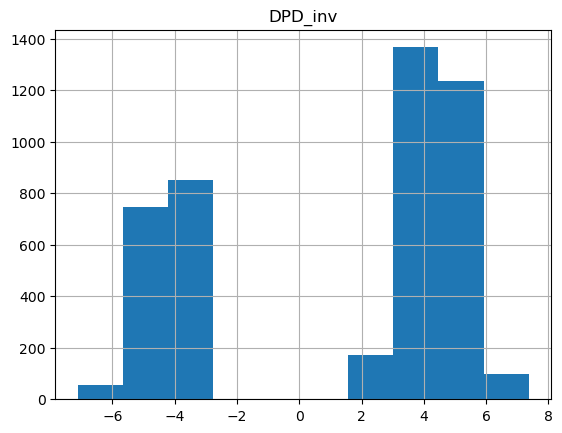

In [37]:
dpd_inv_scores.hist()

In [35]:

norm_s_onc_df = pd.DataFrame(np.stack([cst_inv.n, cst_inv.s], axis=1), 
                             index=cst_inv.svm_input.data.columns, columns=["n", "s"])

In [36]:

pd.to_pickle(dpd_inv_scores,"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/dpd_lincs_scR_inv.pkl")
pd.to_pickle(norm_s_onc_df,"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/stv_lincs_scR_inv.pkl")

### Separate sctransformed data

In [4]:
scdir = '/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_sctransform'

In [44]:
mtx =os.path.join(scdir,"blca_scR_corrected_UMI.mtx")
cells=pd.read_csv(os.path.join(scdir,"blca_scR_corrected_UMI_cells.txt"),header=None,index_col=0)
features=pd.read_csv(os.path.join(scdir,'blca_scR_corrected_UMI_genes.txt'),header=None,sep='\t',index_col=0)
adata = sc.read_mtx(mtx)


In [45]:
adata.obs['CellID']= cells.index.tolist()
adata.var['Gene']= features.index.tolist()
adata.var.index= adata.var['Gene']
display(adata)
print(f'Max val of sct matrix before transformation, {np.max(adata.X)}')

AnnData object with n_obs × n_vars = 28383 × 20047
    obs: 'CellID'
    var: 'Gene'

Max val of sct matrix before transformation, 9.23405647277832


In [46]:
adata.obs.set_index(adata.obs['CellID'],inplace=True)

In [47]:
adata.var_names_make_unique()

# Check values before transformation
print(f'Max val of UMI matrix before transformation: {np.max(adata.X)}')

# Normalize & log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata, base=2)

Max val of UMI matrix before transformation: 9.23405647277832


In [7]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"
data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

In [48]:
indices_t2

array(['AAACCTGAGTCCAGGA.1-GSM4006647_BC4',
       'AAACCTGCAATTCCTT.1-GSM4006647_BC4',
       'AAACCTGGTGTGACGA.1-GSM4006647_BC4', ...,
       'TTTGTCATCACTGGGC.1-GSM4006647_BC4',
       'TTTGTCATCGCTTGTC.1-GSM4006647_BC4',
       'TTTGTCATCTGTACGA.1-GSM4006647_BC4'], dtype=object)

In [49]:
swapped = np.array(['{}_{}'.format(b, a) for a, b in (s.split('-') for s in indices_t2)])

In [50]:
swapped

array(['GSM4006647_BC4_AAACCTGAGTCCAGGA.1',
       'GSM4006647_BC4_AAACCTGCAATTCCTT.1',
       'GSM4006647_BC4_AAACCTGGTGTGACGA.1', ...,
       'GSM4006647_BC4_TTTGTCATCACTGGGC.1',
       'GSM4006647_BC4_TTTGTCATCGCTTGTC.1',
       'GSM4006647_BC4_TTTGTCATCTGTACGA.1'], dtype='<U33')

In [51]:
adata_lincs = adata[:, adata.var.index.isin(genes_list)]

In [52]:
adata_lincs_t2 = adata_lincs[adata_lincs.obs.index.isin(swapped),]

In [53]:
adata_lincs_t2

View of AnnData object with n_obs × n_vars = 2872 × 952
    obs: 'CellID'
    var: 'Gene'
    uns: 'log1p'

In [55]:
swapped = np.array(['{}_{}'.format(b, a) for a, b in (s.split('-') for s in indices_ta)])

In [56]:
adata_lincs_ta = adata_lincs[adata_lincs.obs.index.isin(swapped),]
adata_lincs_ta

View of AnnData object with n_obs × n_vars = 1653 × 952
    obs: 'CellID'
    var: 'Gene'
    uns: 'log1p'

In [61]:
adata_lincs_ta_nmibc = adata_lincs_ta[~adata_lincs_ta.obs.index.str.contains('BC1'),]

In [62]:
adata_lincs_ta_nmibc

View of AnnData object with n_obs × n_vars = 1162 × 952
    obs: 'CellID'
    var: 'Gene'
    uns: 'log1p'

In [63]:
MIBC = adata_lincs_t2.to_df()

NMIBC = adata_lincs_ta_nmibc.to_df()

In [58]:
import cstarpy
from cstarpy.separation import CellStateTransition

In [64]:

cst_inv = CellStateTransition('inv',NMIBC, MIBC)
dpd_inv_scores=cst_inv.get_dpd()
dpd_inv_scores

,DPD_inv
CellID,
GSM4751267_BC6_AAAGATGTCTACTTAC.1,-5.246081
GSM4751267_BC6_AAAGCAAAGAAGGACA.1,-6.673892
GSM4751267_BC6_AAAGCAATCGTTACAG.1,-7.157196
GSM4751267_BC6_AAAGTAGGTTCAACCA.1,-4.871789
GSM4751267_BC6_AAAGTAGTCCTATTCA.1,-3.135875
...,...
GSM4006647_BC4_TTTGTCAGTCCGAGTC.1,3.164519
GSM4006647_BC4_TTTGTCAGTGATAAGT.1,8.088761
GSM4006647_BC4_TTTGTCATCACTGGGC.1,3.809166


array([[<Axes: title={'center': 'DPD_inv'}>]], dtype=object)

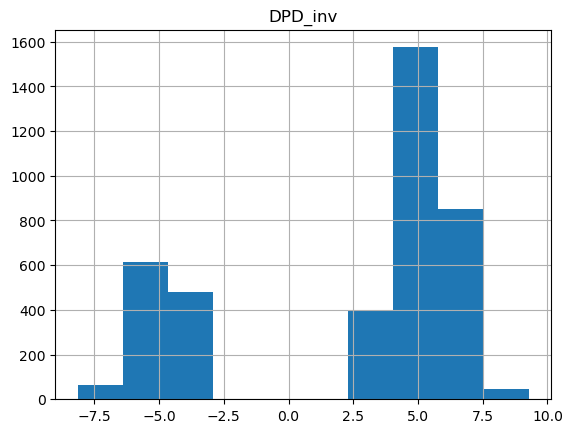

In [65]:
dpd_inv_scores.hist()

In [66]:

norm_s_onc_df = pd.DataFrame(np.stack([cst_inv.n, cst_inv.s], axis=1), 
                             index=cst_inv.svm_input.data.columns, columns=["n", "s"])

In [67]:
pd.to_pickle(dpd_inv_scores,"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/dpd_lincs_scR_bc1removedinv.pkl")
pd.to_pickle(norm_s_onc_df,"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/stv_lincs_scR_bc1removedinv.pkl")